In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [3]:
# Locations
train_loc = r'/content/drive/MyDrive/Machine Learning/Datasets/Chest X-ray (Covid-19 & Pneumonia)/Data/train'
test_loc = r'/content/drive/MyDrive/Machine Learning/Datasets/Chest X-ray (Covid-19 & Pneumonia)/Data/test'

In [4]:
train_data = os.listdir(train_loc)

COVID19_loc = os.path.join(train_loc, 'COVID19')
COVID19_data = os.listdir(COVID19_loc)

PNEUMONIA_loc = os.path.join(train_loc, 'PNEUMONIA')
PNEUMONIA_data = os.listdir(PNEUMONIA_loc)

NORMAL_loc = os.path.join(train_loc, 'NORMAL')
NORMAL_data = os.listdir(NORMAL_loc)

In [5]:
# Summary of data
print('Train Data')
print('-' * 20)
print(f'COVID19: {len(COVID19_data)} images,\nPNEUMONIA: {len(PNEUMONIA_data)} images,\nNORMAL: {len(NORMAL_data)} images.')
print(f'Total: {len(COVID19_data) + len(PNEUMONIA_data) + len(NORMAL_data)}')
print('='*20)

print('\nTest Data')
print('-' * 20)
print(f"COVID19: {len(os.listdir(os.path.join(test_loc, 'COVID19')))} images,")
print(f"PNEUMONIA: {len(os.listdir(os.path.join(test_loc, 'PNEUMONIA')))} images,")
print(f'NORMAL: {len(os.listdir(os.path.join(test_loc, "NORMAL")))} images.')
print(f'Total: {len(os.listdir(os.path.join(test_loc, "COVID19"))) + len(os.listdir(os.path.join(test_loc, "PNEUMONIA"))) + len(os.listdir(os.path.join(test_loc, "NORMAL")))}')
print('='*20)

Train Data
--------------------
COVID19: 460 images,
PNEUMONIA: 3418 images,
NORMAL: 1266 images.
Total: 5144

Test Data
--------------------
COVID19: 116 images,
PNEUMONIA: 855 images,
NORMAL: 317 images.
Total: 1288


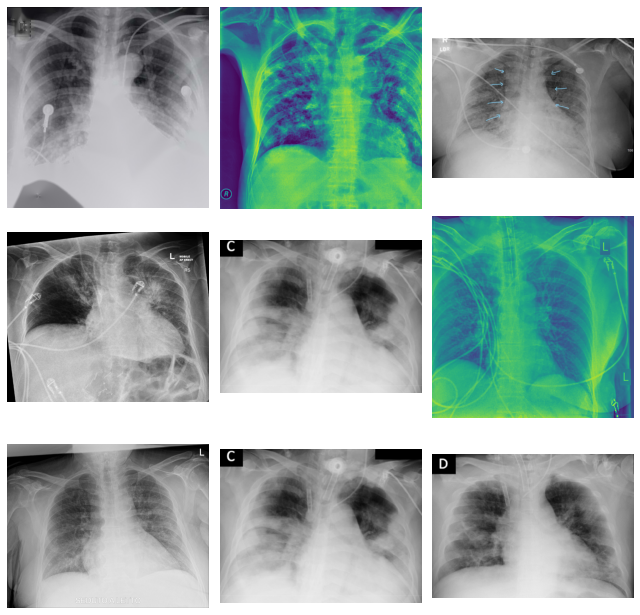

In [6]:
# Show COVID19 data
plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(COVID19_loc, COVID19_data[random.randint(0, len(COVID19_data))]))
    plt.axis('off')
    plt.imshow(img)
plt.tight_layout()
plt.show()

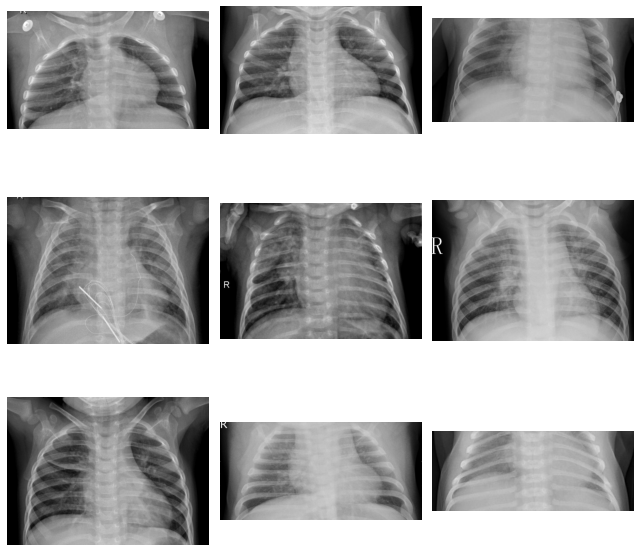

In [7]:
# Show PNEUMONIA data
plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(PNEUMONIA_loc, PNEUMONIA_data[random.randint(0, len(PNEUMONIA_data))]))
    plt.axis('off')
    plt.imshow(img)
plt.tight_layout()
plt.show()

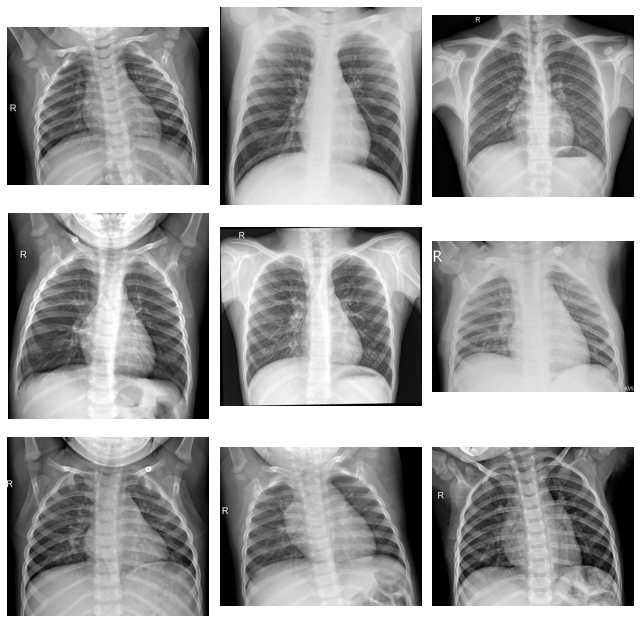

In [8]:
# Show NORMAL data
plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(NORMAL_loc, NORMAL_data[random.randint(0, len(NORMAL_data))]))
    plt.axis('off')
    plt.imshow(img)
plt.tight_layout()
plt.show()

In [9]:
# Data Preprocessing
trdata = ImageDataGenerator(rescale=1/255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True)
new_train_data = trdata.flow_from_directory(directory=train_loc, target_size=(128, 128))

testdata = ImageDataGenerator(rescale=1/255)
new_test_data = testdata.flow_from_directory(directory=test_loc, target_size=(128, 128))

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),

    Flatten(),

    Dense(512, activation='relu'),
    Dense(128, activation='relu'),

    Dense(3, activation='softmax')
])

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 512)               2

In [15]:
batch_size = 100
hist = model.fit(new_train_data,
                 steps_per_epoch=new_train_data.samples//batch_size,
                 validation_data=new_test_data,
                 validation_steps=new_test_data.samples//batch_size,
                 epochs=15
                 )

Epoch 1/15
51/51 [==============================] - 76s 2s/step - loss: 0.3127 - accuracy: 0.8762 - val_loss: 0.2816 - val_accuracy: 0.8820
Epoch 2/15
51/51 [==============================] - 69s 1s/step - loss: 0.3012 - accuracy: 0.8787 - val_loss: 0.2408 - val_accuracy: 0.9053
Epoch 3/15
51/51 [==============================] - 67s 1s/step - loss: 0.2586 - accuracy: 0.9002 - val_loss: 0.1960 - val_accuracy: 0.9262
Epoch 4/15
51/51 [==============================] - 68s 1s/step - loss: 0.2235 - accuracy: 0.9144 - val_loss: 0.1972 - val_accuracy: 0.9301
Epoch 5/15
51/51 [==============================] - 67s 1s/step - loss: 0.2887 - accuracy: 0.8964 - val_loss: 0.2629 - val_accuracy: 0.8991
Epoch 6/15
51/51 [==============================] - 69s 1s/step - loss: 0.2583 - accuracy: 0.9039 - val_loss: 0.1829 - val_accuracy: 0.9340
Epoch 7/15
51/51 [==============================] - 69s 1s/step - loss: 0.2802 - accuracy: 0.8922 - val_loss: 0.2090 - val_accuracy: 0.9293
Epoch 8/15
51/51 [==

In [17]:
train_score = model.evaluate(new_train_data)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])

161/161 [==============================] - 127s 789ms/step - loss: 0.1744 - accuracy: 0.9360
Train Loss:  0.17438296973705292
Train Accuracy:  0.9360420107841492


In [18]:
test_score = model.evaluate(new_test_data)

print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

41/41 [==============================] - 27s 650ms/step - loss: 0.2108 - accuracy: 0.9293
Test Loss:  0.21080422401428223
Test Accuracy:  0.929347813129425


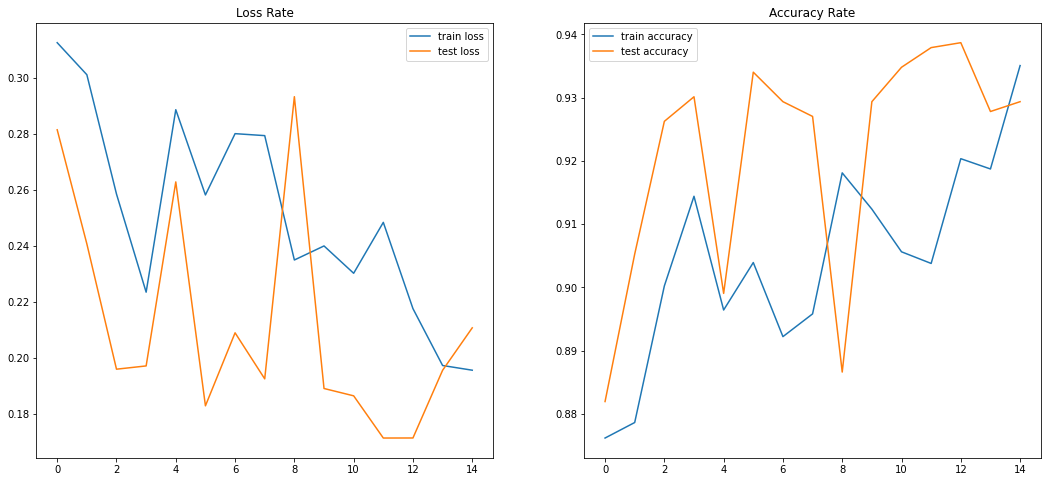

In [21]:
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='test loss')
plt.title('Loss Rate')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'],label='train accuracy')
plt.plot(hist.history['val_accuracy'],label='test accuracy')
plt.title('Accuracy Rate')
plt.legend()

plt.show()